Clean notebook to plot Stokes parameters of NenuFAR dynamic spectra

In [112]:
import warnings
warnings.filterwarnings('ignore')

from nenupy.io import Spectra
from nenupy.io.tf import TFTask, TFPipeline
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import astropy.units as u
from astropy.time import Time
from datetime import datetime

In [129]:
date     = '2025-03-25'
data_dir = '/databf/nenufar-tf/LT11'
obs_dir  = '20250325_091200_20250325_145000_SUN_TRACKING'

start_time = '2025-03-25T10:35:30'
end_time   = '2025-03-25T10:40:00'
figsize = [7,4]

year, month, day = date.split('-')
spectra_files = sorted(glob.glob(f'{data_dir}/{year}/{month}/{obs_dir}/*.spectra'))
low_freq_path  = [ file for file in spectra_files if file.endswith('_0.spectra') ][0]
high_freq_path = [ file for file in spectra_files if file.endswith('_1.spectra') ][0]

print(low_freq_path, high_freq_path, sep='\n')

/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra


2025-05-05 12:18:21 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-05-05 12:18:21 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-05-05 12:18:21 | INFO: Checking for missing data (can take up to 1 min)...
2025-05-05 12:18:21 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-05-05 12:18:21 | INFO: Computing time-frequency axes...
2025-05-05 12:18:21 | INFO: Re-organize data into Jones matrices...
2025-05-05 12:18:21 | INFO: 	Convert data to Dask array
2025-05-05 12:18:21 | INFO: Data loaded.
2025-05-05 12:18:21 | INFO: Selecting times (between 2025-03-25T10:35:30.000 and 2025-03-25T10:40:00.000)...
2025-05-05 12:18:21 | INFO: 	12876 time samples selected.
2025-05-05 12:18:21 | INFO: Selecting frequencies (between 21.6796875 MHz and 59.1796875 MH

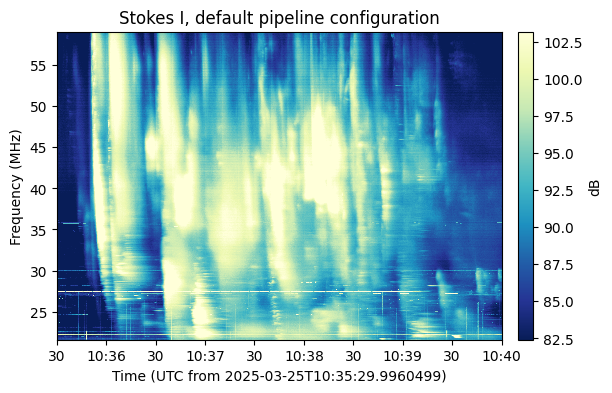

In [130]:
stokes_param = 'I'
low_data_i = Spectra(filename=low_freq_path)
low_data_i = low_data_i.get(stokes=stokes_param, tmin=start_time, tmax=end_time, ignore_volume_warning=True)
low_data_i.plot(figsize=figsize, title=f'Stokes {stokes_param}, default pipeline configuration')

2025-05-05 12:19:45 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra...
2025-05-05 12:19:45 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra has been correctly parsed.
2025-05-05 12:19:45 | INFO: Checking for missing data (can take up to 1 min)...
2025-05-05 12:19:45 | INFO: 	There are 2/15276 blocks containing missing data and/or wrong time information.
2025-05-05 12:19:45 | INFO: Computing time-frequency axes...
2025-05-05 12:19:45 | INFO: Re-organize data into Jones matrices...
2025-05-05 12:19:45 | INFO: 	Convert data to Dask array
2025-05-05 12:19:45 | INFO: Data loaded.
2025-05-05 12:19:45 | INFO: Selecting times (between 2025-03-25T10:35:30.000 and 2025-03-25T10:40:00.000)...
2025-05-05 12:19:45 | INFO: 	12876 time samples selected.
2025-05-05 12:19:45 | INFO: Selecting frequencies (between 59.1796875 MHz and 84.1796875 MH

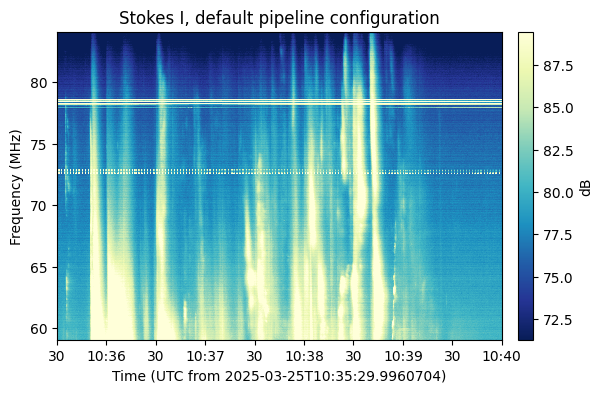

In [131]:
stokes_param = 'I'
high_data_i = Spectra(filename=high_freq_path)
high_data_i = high_data_i.get(stokes=stokes_param, tmin=start_time, tmax=end_time, ignore_volume_warning=True)
high_data_i.plot(figsize=figsize, title=f'Stokes {stokes_param}, default pipeline configuration')

In [132]:
low_times  = np.array([datetime.utcfromtimestamp(t) for t in low_data_i.time.unix])
high_times = np.array([datetime.utcfromtimestamp(t) for t in high_data_i.time.unix])

In [133]:
low_times[0], low_times[-1], np.diff(low_times)

(datetime.datetime(2025, 3, 25, 10, 35, 29, 996050),
 datetime.datetime(2025, 3, 25, 10, 40, 0, 4370),
 array([datetime.timedelta(microseconds=20971),
        datetime.timedelta(microseconds=20972),
        datetime.timedelta(microseconds=20971), ...,
        datetime.timedelta(microseconds=20972),
        datetime.timedelta(microseconds=20971),
        datetime.timedelta(microseconds=20972)], dtype=object))

In [134]:
high_times[0], high_times[-1], np.diff(high_times)

(datetime.datetime(2025, 3, 25, 10, 35, 29, 996070),
 datetime.datetime(2025, 3, 25, 10, 40, 0, 4393),
 array([datetime.timedelta(microseconds=20972),
        datetime.timedelta(microseconds=20971),
        datetime.timedelta(microseconds=20972), ...,
        datetime.timedelta(microseconds=20972),
        datetime.timedelta(microseconds=20971),
        datetime.timedelta(microseconds=20972)], dtype=object))

In [135]:
print(f'Difference in start times: {(high_times[0] - low_times[0]).total_seconds()*1e6} us')
print(f'Difference in end times: {(high_times[-1] - low_times[-1]).total_seconds()*1e6} us')

Difference in start times: 20.0 us
Difference in end times: 23.0 us


In [136]:
low_dt_us  = [ t.total_seconds()*1e6 for t in np.diff(low_times) ]
high_dt_us = [ t.total_seconds()*1e6 for t in np.diff(high_times) ]

low_dt_ms  = [ t.total_seconds()*1e3 for t in np.diff(low_times) ]
high_dt_ms = [ t.total_seconds()*1e3 for t in np.diff(high_times) ]

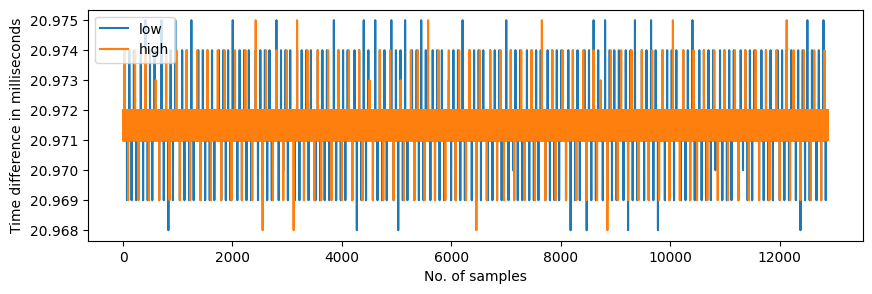

In [137]:
plt.figure(figsize=[10,3])
plt.plot(low_dt_ms, label='low')
plt.plot(high_dt_ms, label='high')
plt.xlabel('No. of samples')
plt.ylabel('Time difference in milliseconds')
plt.legend(loc='best')
plt.show()

In [138]:
combined_data  = np.concatenate((low_data_i.data, high_data_i.data), axis=1)
combined_data  = np.squeeze(combined_data)
combined_data  = 10 * np.log10(combined_data) # Convert the amplitude in decibels
combined_freqs = np.concatenate((low_data_i.freq.to_value('MHz'), high_data_i.freq.to_value('MHz')))

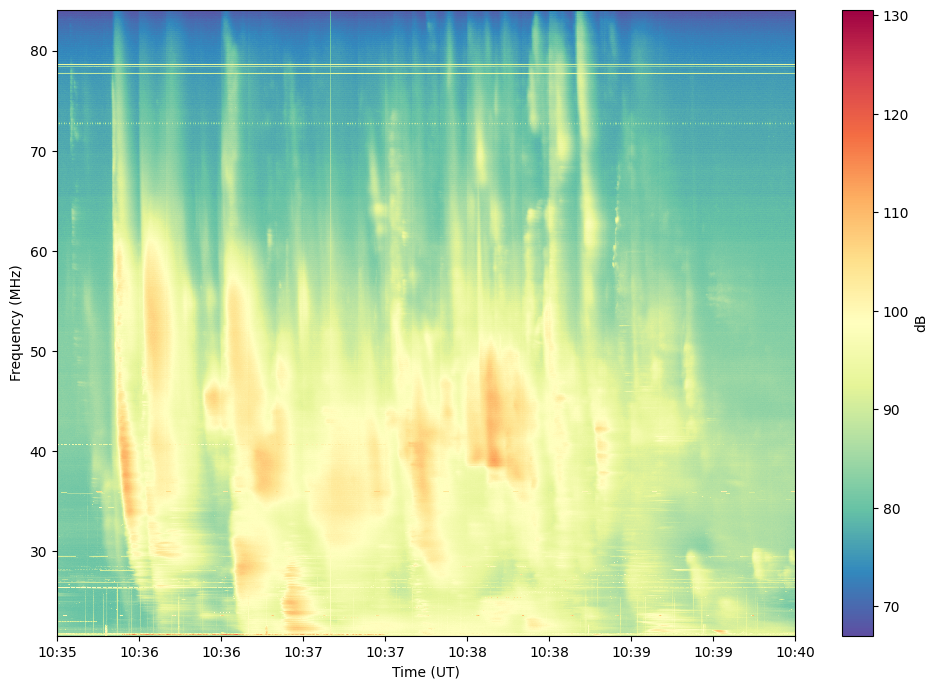

In [139]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(low_times, combined_freqs, combined_data.T,
                    shading='auto', cmap='Spectral_r') # Spectral_r, YlGnBu_r
fig.colorbar(pc, ax=ax, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

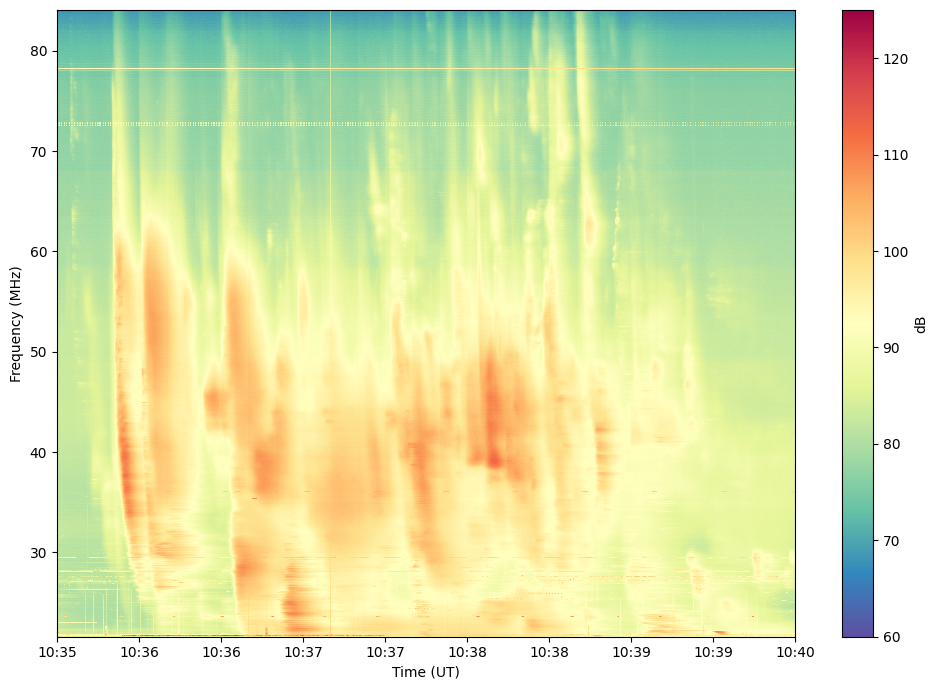

In [140]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(low_times, combined_freqs, combined_data.T,
                    vmin=60, vmax=125,
                    shading='auto', cmap='Spectral_r') # Spectral_r, YlGnBu_r
fig.colorbar(pc, ax=ax, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [211]:
radio_lightcurves = {}
f_targets = [30, 40, 50, 60, 70, 80]

for f_target in f_targets:
    f_index = np.abs(combined_freqs - f_target).argmin()
    freq_channel = f'{round(combined_freqs[f_index])} MHz'
    radio_lightcurves[freq_channel] = combined_data[:, f_index]

In [213]:
radio_lightcurves.keys()

dict_keys(['30 MHz', '40 MHz', '50 MHz', '60 MHz', '70 MHz', '80 MHz'])

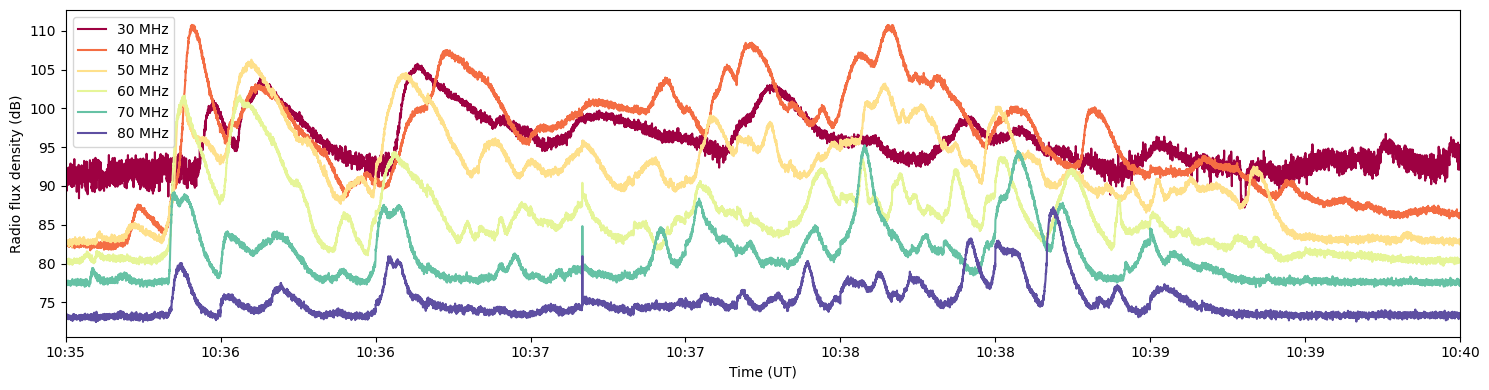

In [224]:
# Choose a colormap with many distinguishable colors
cmap        = plt.cm.get_cmap('Spectral')
num_lines   = len(radio_lightcurves.keys())
colors_list = cmap(np.linspace(0, 1, num_lines))

fig = plt.figure(figsize=[15,4])
ax = fig.add_subplot(111)

for i, key in enumerate(radio_lightcurves):
    ax.plot(low_times, radio_lightcurves[key], color=colors_list[i], label=key)

ax.legend(loc='best')
# ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Radio flux density (dB)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=low_times[0], right=low_times[-1])
fig.tight_layout()
plt.show()

In [203]:
# Find index of closest value
f_target = 40
f_index = np.abs(combined_freqs - f_target).argmin()
print(f_index)
print(combined_freqs[f_index])

3018
40.00244140625


In [147]:
radio_lightcurve = combined_data[:, f_index]

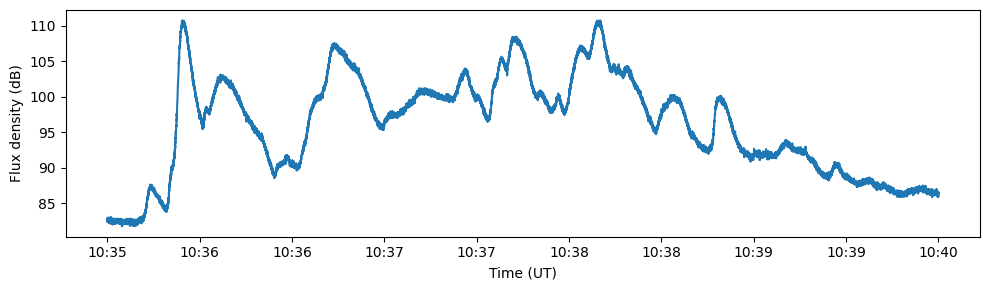

In [149]:
fig = plt.figure(figsize=[10,3])
ax = fig.add_subplot(111)
ax.plot(low_times, radio_lightcurve)
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Flux density (dB)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [152]:
# fig = plt.figure(figsize=[10, 7])
# ax = fig.add_subplot(111)

# # Plot the dynamic spectrum
# pc = ax.pcolormesh(low_times, combined_freqs, combined_data.T,
#                    vmin=60, vmax=125,
#                    shading='auto', cmap='Spectral_r')

# fig.colorbar(pc, ax=ax, label='dB')

# # Normalize the lightcurve to plot it visually on the frequency axis
# norm_curve = (radio_lightcurve - np.min(radio_lightcurve)) / (np.max(radio_lightcurve) - np.min(radio_lightcurve))
# freq_offset = 80  # e.g., 80 MHz
# freq_range = 5    # adjust vertical scaling

# ax.plot(low_times, freq_offset + norm_curve * freq_range, color='k', label='Lightcurve')

# # Labels and formatting
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel('Frequency (MHz)')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# fig.tight_layout()
# plt.legend()
# plt.show()

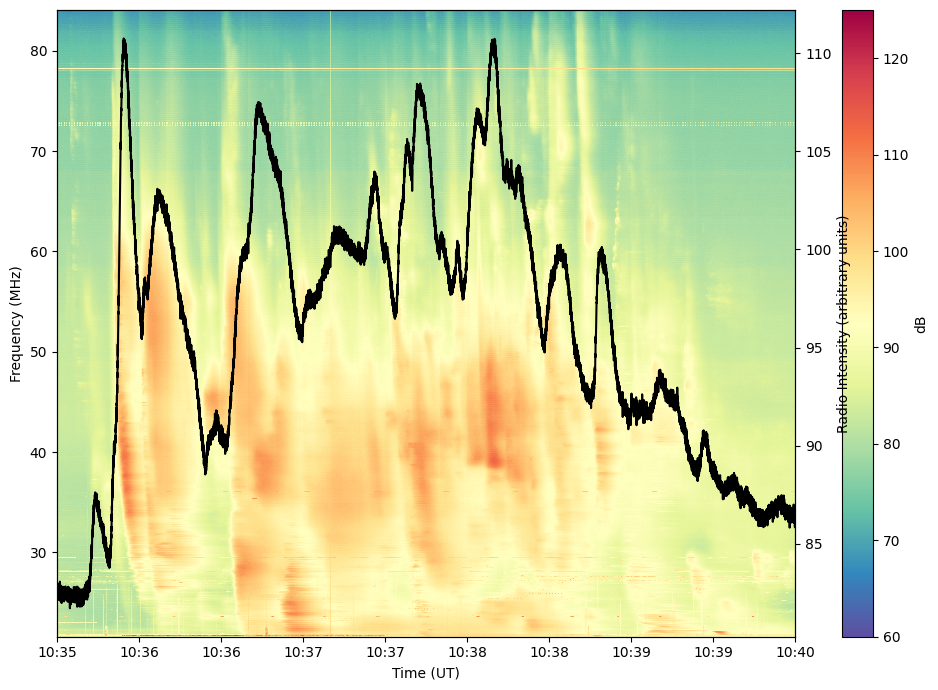

In [153]:
fig, ax1 = plt.subplots(figsize=[10,7])

# Plot dynamic spectrum on the left y-axis
pc = ax1.pcolormesh(low_times, combined_freqs, combined_data.T,
                    vmin=60, vmax=125,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax1, label='dB')

ax1.set_xlabel('Time (UT)')
ax1.set_ylabel('Frequency (MHz)')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot the radio lightcurve on a secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(low_times, radio_lightcurve, color='k', label='Lightcurve')
ax2.set_ylabel('Radio Intensity (arbitrary units)', color='k')
ax2.tick_params(axis='y', labelcolor='k')

fig.tight_layout()
plt.show()

In [155]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido

ql_query = Fido.search(a.Time(low_times[0], low_times[-1]),
                       a.Instrument.stix, a.stix.DataProduct.ql_lightcurve)

In [156]:
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str13,str3,str1
2025-03-25 00:00:00.000,2025-03-25 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-


In [157]:
ql_files = Fido.fetch(ql_query)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-ql-lightcurve_20250325_V02.fits:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

In [176]:
from datetime import datetime, timedelta
from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)

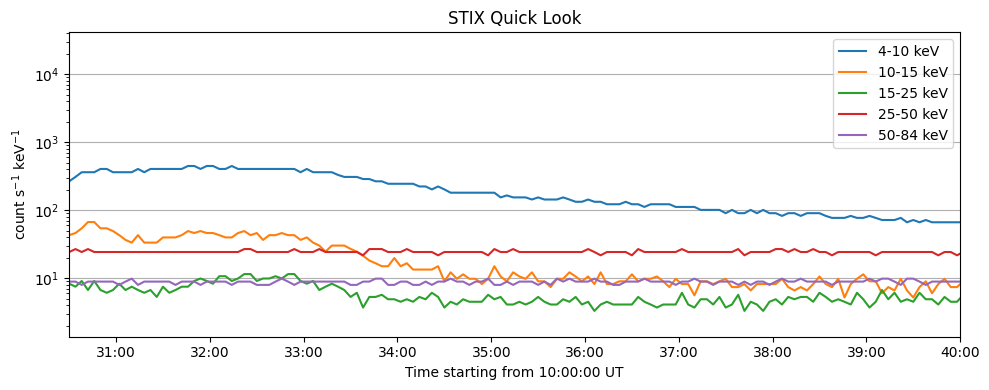

In [225]:
fig, ax = plt.subplots(figsize=[10,4])
ql_lightcurves.plot(axes=ax)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
# Prevent x-tick label rotation
plt.setp(ax.get_xticklabels(), rotation=0)
# Center-align the labels
for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')
# ax.set_xlim(left=low_times[0], right=low_times[-1])

dt = timedelta(minutes=5)
ax.set_xlim(left=low_times[0]-dt, right=low_times[-1])
ax.set_xlabel(f'Time starting from {low_times[0].time().hour}:00:00 UT')
fig.tight_layout()
plt.show()

In [235]:
ql_lightcurves.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2025-03-25T00:00:01.983000 | control_index   | simple: True                                      |
|            to             | timedel         | bitpix: 8                                         |
|2025-03-25T23:59:57.783000 | triggers        | naxis: 0                                          |
|                           | triggers_comp_e | extend: True                                      |
|                           | rcr             | filename: solo_L1_stix-ql-lightcurve_20250325_V02.|
|                           | 4-10 keV        | raw_file: TM_Hourly_Req_BatchRequest.PktTmRaw.SOL.|
|                           | 10-15 keV       | parent: solo_L0_stix-ql-lightcurve_0796089600_V02.|


In [236]:
ql_lightcurves.meta['EAR_TDEL']

TypeError: 'TimeSeriesMetaData' object is not subscriptable

In [251]:
ql_lightcurves.meta.metas[0]['keycomments']['EAR_TDEL']

'[s] Time(Sun to Earth) - Time(Sun to S/C)'

In [237]:
[x for x in dir(ql_lightcurves.meta) if not x.startswith('_')]

['append',
 'columns',
 'concatenate',
 'find',
 'find_indices',
 'get',
 'get_index',
 'metadata',
 'metas',
 'time_range',
 'timeranges',
 'to_string',
 'update',
 'values']

In [269]:
ql_lightcurves.meta.metadata[0][2]['keycomments']['EAR_TDEL']

'[s] Time(Sun to Earth) - Time(Sun to S/C)'

In [270]:
ql_lightcurves.meta.metadata[0][2]['EAR_TDEL']

336.15627018584416

In [276]:
336.15627018584416/60

5.602604503097402

In [275]:
for i, item in enumerate(ql_lightcurves.meta.metadata[0]):
    print(f'Index {i}: type = {type(item)}')
    if isinstance(item, dict) and 'EAR_TDEL' in item:
        print(item['EAR_TDEL'])

Index 0: type = <class 'sunpy.time.timerange.TimeRange'>
Index 1: type = <class 'list'>
Index 2: type = <class 'sunpy.util.metadata.MetaDict'>
336.15627018584416


---

Troupleshooting

In [43]:
# stokes_param = 'Q'
# low_data_q = Spectra(filename=low_freq_path)
# low_data_q = low_data_q.get(stokes=stokes_param, tmin=start_time, tmax=end_time, ignore_volume_warning=True)
# low_data_q.plot(figsize=figsize, title=f'Stokes {stokes_param}, default pipeline configuration')

In [42]:
# stokes_param = 'U'
# low_data_u = Spectra(filename=low_freq_path)
# low_data_u = low_data_u.get(stokes=stokes_param, tmin=start_time, tmax=end_time, ignore_volume_warning=True)
# low_data_u.plot(figsize=figsize, title=f'Stokes {stokes_param}, default pipeline configuration')

In [41]:
# stokes_param = 'V'
# low_data_v = Spectra(filename=low_freq_path)
# low_data_v = low_data_v.get(stokes=stokes_param, tmin=start_time, tmax=end_time, ignore_volume_warning=True)
# low_data_v.plot(figsize=figsize, title=f'Stokes {stokes_param}, default pipeline configuration')

In [44]:
# u_i = low_data_u.data/low_data_i.data
# u_i = np.squeeze(u_i)
# freqs = low_data_i.freq.to_value('MHz')
# times = np.array([datetime.utcfromtimestamp(t) for t in low_data_i.time.unix])

# fig = plt.figure(figsize=[7,4])
# ax = fig.add_subplot(111)
# pc = ax.pcolormesh(times, freqs, u_i.T,
#                     vmin=-0.5, vmax=0.5,
#                     shading='auto', cmap='seismic')
# fig.colorbar(pc, ax=ax, label='degree of U/I')
# ax.set_xlabel('Time (UT)')
# ax.set_ylabel('Frequency (MHz)')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# fig.tight_layout()
# plt.show()